# Matplotlib - Intro

* **matplotlib** is a Python plotting library for producing publication quality figures
    * allows for interactive, cross-platform control of plots
    * makes it easy to produce static raster or vector graphics
        * gives the developer complete control over the appearance of their plots, while still being usable through a powerful defaults system
* standard scientific plotting library
* online documentnation is on [matplotlib.org](https://matplotlib.org/index.html), with lots of examples in the [gallery](https://matplotlib.org/gallery.html)

* behaves similarly to Matlab

In [1]:
import matplotlib.pyplot as plt
import numpy as np

To be efficient with **matplotlib**, you first need to understand its termonology.

## Parts of a Figure

<img src="../../figures/matplotlib_figure_parts.png" style="height:90%; width:90%;">

### Figure, Axes, Axis

* **Figure** is the whole image, the top-level 'container' that holds all objects of an image.
* **Axes** is the region of a **Figure** that displays your data. Most plotting occurs here! Very similar to a subplot
* **Axes** contains **Axis** objects (x axis,y axis) which control the data limits.
* **Figure** can have any number of **Axes**, but to be useful should have at least one.

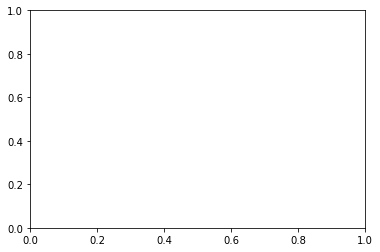

In [2]:
fig = plt.figure() # Create a figure
axes = fig.add_subplot(111) # add one Axes to Figure

Usually an **Axes** is set up with a call to `fig.add_subplot()`, `plt.subplot()`, or `plt.subplots()` 

The most flexible option is `plt.subplots()`

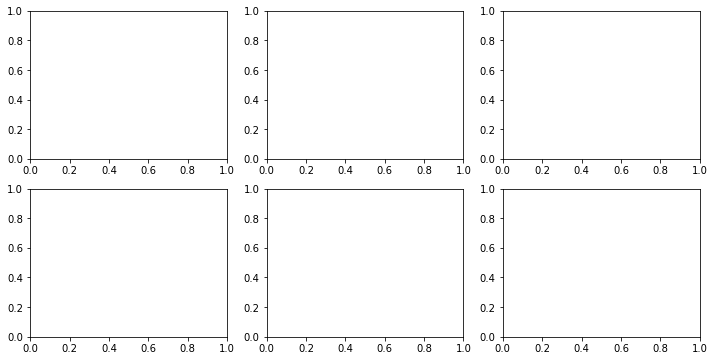

In [3]:
fig,axes = plt.subplots(2,3,figsize=(12,6))
# This will create a figure and 6 axes arranged in 2 rows, 3 columns

### Line plots

Lets draw two cosine functions of different amplitude on the same **Axes**.

In [4]:
# Create data
X = np.linspace(-np.pi, np.pi, 100, endpoint=True)
Y1 = np.cos(X)
Y2 = 2*np.cos(X)

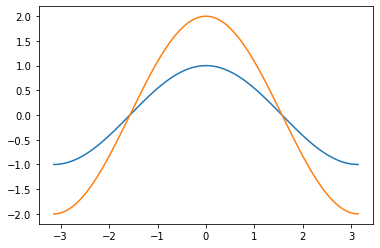

In [5]:
# Plot data
fig, axes = plt.subplots()
axes.plot(X, Y1)
axes.plot(X, Y2);

** Tip: by adding a semicolon at the end of a function, the output is suppressed.

### Default and named colors

![](../figures/dflt_style_changes-1.png)

**Exercise 0 (10 mins)**. The figure before is generated using the default settings. The code below shows these settings explicitly. Play with the values to explore their effect. For details on changing properties see [line plots on the matplotlib website](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

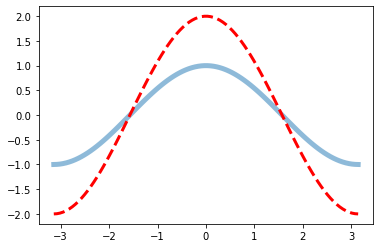

In [6]:
# Plot data (with explicit plotting settings)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
axes.plot(X, Y1, color='C0', linewidth=5.0, linestyle='-',alpha=0.5)
axes.plot(X, Y2, color='r', linewidth=3.0, linestyle='--')

In [7]:
# Your code here

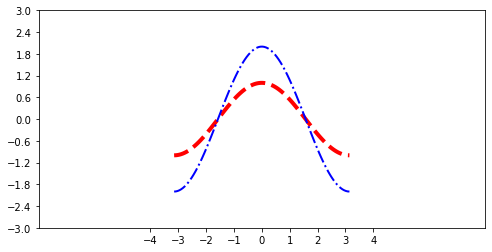

In [8]:
# Sample solution
# Plot data (with explicit plotting settings)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
axes.plot(X, Y1, color='r', linewidth=4, linestyle='--')
axes.plot(X, Y2, color='b', linewidth=2, linestyle='-.')
axes.set_xlim(-8, 8)
axes.set_ylim(-3, 3)
axes.set_xticks(np.linspace(-4,4,9,endpoint=True))
axes.set_yticks(np.linspace(-3,3,11,endpoint=True));

**Exercise 1 (10 mins)**. Having integer numbers on the x axis here might divert reader's attention from the critical points of the graph.

1. Change **xticks** and **xticklabels** into multiples of $\pi$. Use `axes.set_xticks()` and `axes.set_xticklabels()`.

\*\* Tip: use `np.pi` for **xticks** and '\$\pi$' for **xticklabels**. format strings in LaTeX by prepending 'r'ie `axes.set_xticklabels([r'$\pi$'])`

In [9]:
# Your code here

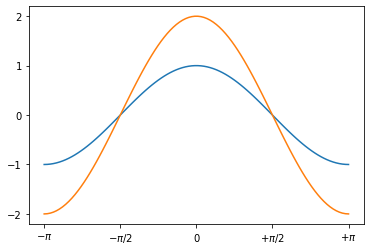

In [10]:
# Solution
# Change xticks, yticks and xticklabels
fig, axes = plt.subplots()
axes.plot(X, Y1);
axes.plot(X, Y2);

axes.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]);
axes.set_yticks([-2, -1, 0, 1, 2]);
axes.set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$']);

**Exersise 2 (5 mins)**. Add a legend.
1. Give both cosine functions a name by adding an extra keyword argument, a label, to `axes.plot()`.
2. Add a legend object to **Axes**. 

In [11]:
# Your code here

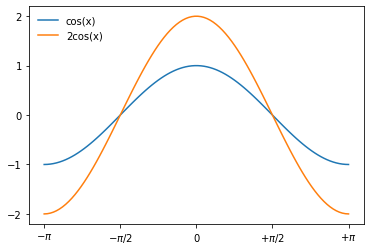

In [12]:
# Solution
# Add a legend
fig, axes = plt.subplots()
axes.plot(X, Y1, label='cos(x)');
axes.plot(X, Y2, label='2cos(x)');

axes.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]);
axes.set_yticks([-2, -1, 0, 1, 2]);
axes.set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$']);
axes.legend(loc='upper left', frameon=False);


**Exercise 3 (10 mins)**. Annotate an interesting point on a graph, for example, $2\cos(\frac{\pi}{4})$.
1. Add a single point to the graph by using `axes.plot(..., marker='o')`.
2. Use `axes.annotate(s, xy=..., xytext=...)` to add annotation.

** Tip: visit [annotations](https://matplotlib.org/users/annotations_intro.html).

In [13]:
# Your code here

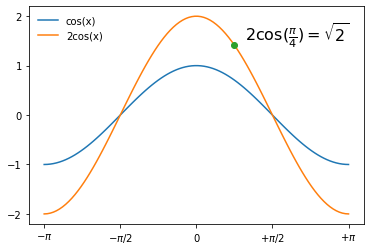

In [14]:
fig, axes = plt.subplots()
axes.plot(X, Y1, label='cos(x)');
axes.plot(X, Y2, label='2cos(x)');

axes.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]);
axes.set_yticks([-2, -1, 0, 1, 2]);
axes.set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$']);
axes.legend(loc='upper left', frameon=False);
point = np.pi/4
axes.plot(point, 2*np.cos(point), marker='o');
axes.annotate(r'$2\cos(\frac{\pi}{4})=\sqrt{2}$', xy=(point, 2*np.cos(point)), xytext=(1, 1.5), fontsize=16);

### Demonstration of bar() on NAO index data

Bar plots are created in much the same way as line plots, with two arrays of equal size.

Here we use `bar()` to plot the data on North Atlantic oscillation from the NWS Climate Prediction Center. 

Data source: http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao.shtml

Variable: monthly mean NAO index since January 1950 til March 2019.

Data stored in text file in the following way:

Year | Month | Value

1950 1 0.92000E+00

# Read NAO data


In [15]:
nao_yr, nao_mn, nao_val = np.loadtxt('../../data/nao_monthly.txt', unpack=True)

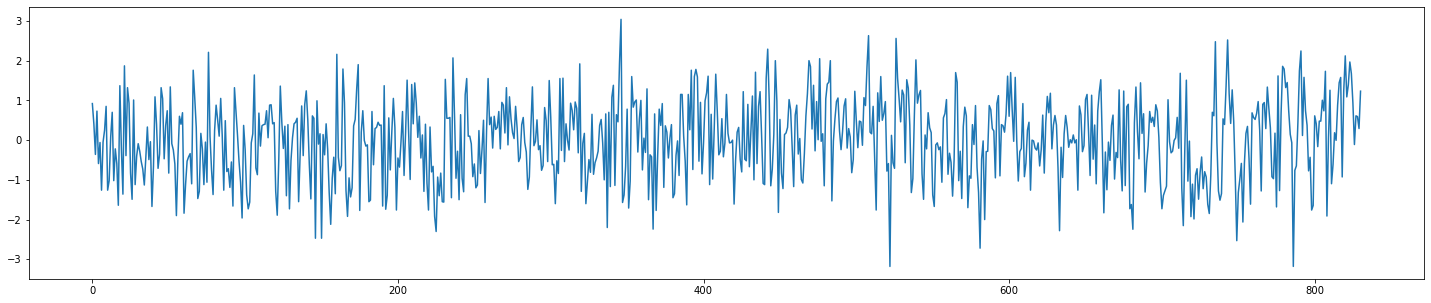

In [16]:
# Quick look at the data
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(nao_val);

Let's focus on the last 5 years and slice `nao_yr`, `nao_mn`, `nao_val` arrays accordingly.

In [17]:
# Slicing
nao_yr_sub = nao_yr[-12*5:]
nao_mn_sub = nao_mn[-12*5:]
nao_val_sub = nao_val[-12*5:]

In [18]:
# Create an array of month numbers
nao_time = np.arange(len(nao_val_sub))
nao_time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

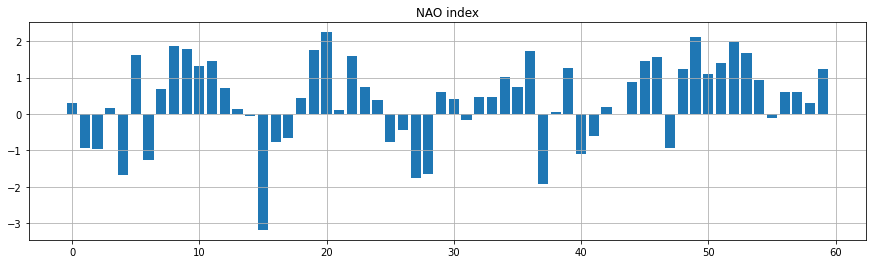

In [19]:
# Plot bar
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(nao_time, nao_val_sub)
ax.set_title('NAO index')
ax.grid(True)

### Scatter plots

* display data as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis
* colorcode the data points to display an additional variable
* good for non-gridded data

`scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, edgecolors=None, **kwargs)`

In [20]:
# Generate some data (circles of random diameter)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = np.pi*(15*np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)

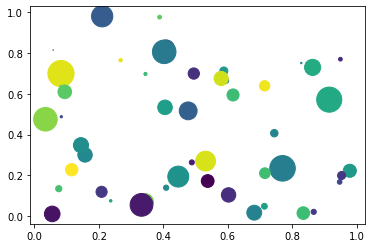

In [21]:
# Plot scatter
plt.scatter(x, y, s=area, c=colors);

### Multiple subplots

`plt.subplots()` is a function that creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 

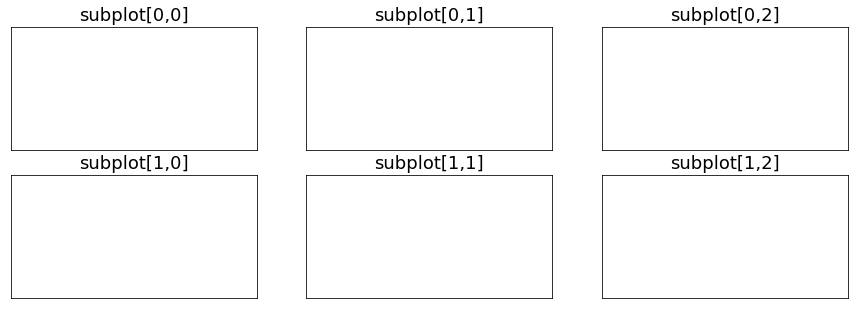

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5)) # or plt.subplots(2,3,figsize=(15,5))
axes[0,0].set_title('subplot[0,0]', fontsize=18);
axes[0,1].set_title('subplot[0,1]', fontsize=18);
axes[0,2].set_title('subplot[0,2]', fontsize=18);
axes[1,0].set_title('subplot[1,0]', fontsize=18);
axes[1,1].set_title('subplot[1,1]', fontsize=18);
axes[1,2].set_title('subplot[1,2]', fontsize=18);

for ax in axes.flat: # you can loop over axes
    ax.set_xticks([]);
    ax.set_yticks([]);

### Subplots with real data

To practice our plotting we are going to work with data from the NOAA ESRL Carbon Cycle Cooperative Global Air Sampling Network.

Source: https://www.esrl.noaa.gov/gmd/dv/data/

Monthly averages of atmospheric carbon dioxide ($CO_2$) and methane ($CH_4$) 

Stations: 
* CGO = Cape Grim, Tasmania, Australia
* MHD = Mace Head, County Galway, Ireland

Units:
* $CO_2$ - ppm
* $CH_4$ - ppb

Data stored in a text file. The top row states the number of header lines in the file. No title headers. The actual data is ogranized as following:

|Station code | Year | Month | Measurement|
| :------------- | :----------: | :----------|  :---------- |
|CGO       |     1984   |  4  |     341.63  |

#### Read data from a text file

The simplest way to load data from a text file in `numpy` is to use `np.loadtxt()` function.

In [23]:
# np.loadtxt() # hit Shift+Tab+Tab

This function has a lot parameters that you can adjuct to fit  your data format. Here we use only:

`np.loadtxt(fname, skiprows=..., usecols=..., unpack=...)`

In [24]:
data = np.loadtxt('../../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3))
data

array([[1984.  ,    4.  ,  341.64],
       [1984.  ,    5.  ,  341.73],
       [1984.  ,    6.  ,  342.  ],
       ...,
       [2018.  ,   10.  ,  406.11],
       [2018.  ,   11.  ,  405.84],
       [2018.  ,   12.  ,  405.59]])

If we want to have three separate arrays for year, month and value, we can set `unpack=True` and store the output from `np.loadtxt()` function in three separate arrays.

In [25]:
year, month, value = np.loadtxt('../../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3), unpack=True)

In [26]:
year[0:8]

array([1984., 1984., 1984., 1984., 1984., 1984., 1984., 1984.])

In [27]:
month[0:8]

array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [28]:
value[0:8]

array([341.64, 341.73, 342.  , 342.81, 343.48, 343.31, 343.1 , 343.01])

#### Kwargs

* remember from yesterday, you can store any number of keyword arguments in a dictionary, and later unpack it when calling a function

In [29]:
# Kwargs
read_data_kwargs = dict(skiprows=68, usecols=(1, 2, 3), unpack=True)

In [30]:
# Read data
# CO2 
cgo_co2_yr, cgo_co2_mn, cgo_co2_val = np.loadtxt('../../data/co2_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_co2_yr, mhd_co2_mn, mhd_co2_val = np.loadtxt('../../data/co2_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
# CH4
cgo_ch4_yr, cgo_ch4_mn, cgo_ch4_val = np.loadtxt('../../data/ch4_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_ch4_yr, mhd_ch4_mn, mhd_ch4_val = np.loadtxt('../../data/ch4_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)


We'll find out how to properly plot on a time axis soon! For now, create dummy time arrays by some arithmetic to numpy arrays.

In [31]:
cgo_co2_time_dummy = cgo_co2_yr*12 + cgo_co2_mn
mhd_co2_time_dummy = mhd_co2_yr*12 + mhd_co2_mn
cgo_ch4_time_dummy = cgo_ch4_yr*12 + cgo_ch4_mn
mhd_ch4_time_dummy = mhd_ch4_yr*12 + mhd_ch4_mn

**Exercise 4a (20 mins)**. Construct two subplots using the arrays created above. Add titles, x and y labels, legend. If you have time, play with optional arguments of `plot()` and try to use **kwargs**.

The desired outcome is something like this (time on x axis will follow in part b):

<img src="../../figures/subplots_example.png">

In [32]:
# Your code here

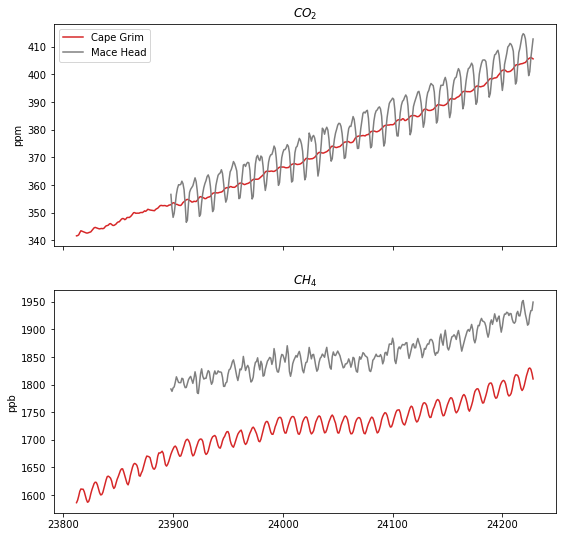

In [33]:
# Solution
# plt.rcParams['mathtext.default'] = 'regular'
cgo_kwargs = dict(label='Cape Grim', color='C3', linestyle='-')
mhd_kwargs = dict(label='Mace Head', color='C7', linestyle='-')

fig, axes = plt.subplots(nrows=2, figsize=(9,9), sharex=True)

axes[0].plot(cgo_co2_time_dummy, cgo_co2_val, **cgo_kwargs)
axes[1].plot(cgo_ch4_time_dummy, cgo_ch4_val, **cgo_kwargs)

axes[0].plot(mhd_co2_time_dummy, mhd_co2_val, **mhd_kwargs)
axes[1].plot(mhd_ch4_time_dummy, mhd_ch4_val, **mhd_kwargs)

axes[0].set_title('$CO_{2}$')
axes[1].set_title('$CH_{4}$')

axes[0].set_ylabel('ppm')
axes[1].set_ylabel('ppb')

axes[0].legend();
#fig.savefig('../../figures/subplots_example.png',bbox_inches='tight')

#### Datetime

* `datetime` module helps to work with time arrays

In [34]:
from datetime import datetime

In [35]:
datetime.now()

datetime.datetime(2022, 4, 29, 12, 59, 52, 484004)

In [36]:
a_date = datetime(2019, 5, 23)

In [37]:
a_date

datetime.datetime(2019, 5, 23, 0, 0)

In [38]:
python_course_dates = [datetime(2019, 5, i) for i in [22, 23, 24]]

In [39]:
python_course_dates

[datetime.datetime(2019, 5, 22, 0, 0),
 datetime.datetime(2019, 5, 23, 0, 0),
 datetime.datetime(2019, 5, 24, 0, 0)]

Let's apply it to our arrays.

In [40]:
# Using list comprehension
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]

In [41]:
# Same as in previous cell but using a for loop
cgo_co2_time = []
for i, j in zip(cgo_co2_yr, cgo_co2_mn):
    cgo_co2_time.append(datetime(int(i), int(j), 1))

In [42]:
mhd_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2_yr, mhd_co2_mn)]



cgo_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4_yr, cgo_ch4_mn)]
mhd_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4_yr, mhd_ch4_mn)]


<b>Exercise 4b.</b> Improve your solution to exercise 4a by using the newly created datetime arrays. Note how matplotlib understands the datetime format. 

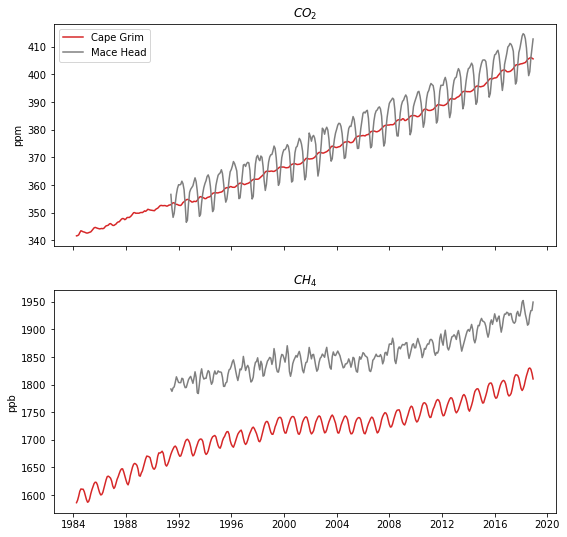

In [43]:
# Solution
# plt.rcParams['mathtext.default'] = 'regular'

cgo_kwargs = dict(label='Cape Grim', color='C3', linestyle='-')
mhd_kwargs = dict(label='Mace Head', color='C7', linestyle='-')

fig, axes = plt.subplots(nrows=2, figsize=(9,9), sharex=True)

axes[0].plot(cgo_co2_time, cgo_co2_val, **cgo_kwargs)
axes[1].plot(cgo_ch4_time, cgo_ch4_val, **cgo_kwargs)

axes[0].plot(mhd_co2_time, mhd_co2_val, **mhd_kwargs)
axes[1].plot(mhd_ch4_time, mhd_ch4_val, **mhd_kwargs)

axes[0].set_title('$CO_{2}$')
axes[1].set_title('$CH_{4}$')

axes[0].set_ylabel('ppm')
axes[1].set_ylabel('ppb')

axes[0].legend();
#fig.savefig('../../figures/subplots_example.png',bbox_inches='tight')

---
---

## Plotting 2D data: contour (and contourf) plots

In [44]:
import matplotlib.pyplot as plt
import numpy as np

* `contour()` and `contourf()` draw contour lines and filled contours, respectively
* good for 2D gridded data

** Note: `contourf()` differs from the Matlab version in that it does not draw the polygon edges. To draw edges, add line contours with calls to `contour()`.

`contour(Z)` - make a contour plot of an array Z. The level values are chosen automatically, axes will refer to indices in the array.

`contour(X, Y, Z)` - X, Y specify the (x, y) coordinates of the surface

`contour(X, Y, Z, N)` - contour up to N automatically-chosen levels

`contour(X, Y, Z, [level1, level2])` - contour on specific levels, e.g. level1, level2. 

In [45]:
# Let's create a function to generate some data
def fun(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2) 

In [46]:
# Create a regular (x,y) grid
n = 200
x1d = np.linspace(-3,3,n)
y1d = np.linspace(-3,3,n)
X, Y = np.meshgrid(x1d, y1d) # repeat x y times and y x times

In [47]:
# Calculate the data
data = fun(X,Y)

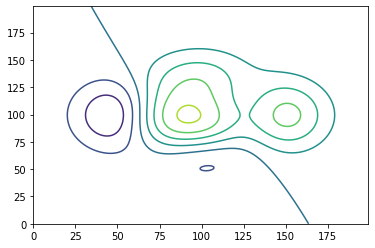

In [48]:
# A simple example first: 
plt.contour(data);
#plt.contour(X, Y, data);

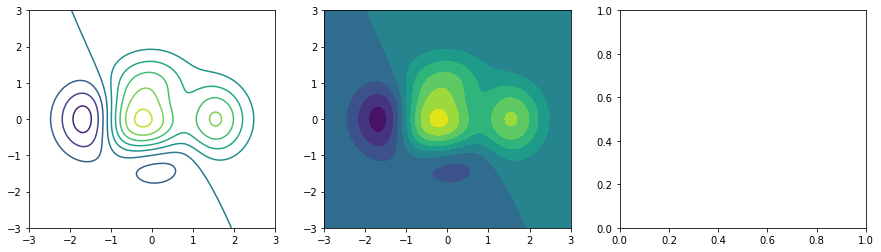

In [49]:
# Plot subplots using contour and contourf
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, data, 10);
ax2.contourf(X, Y, data, 10);
#ax3.contour(X, Y, data, 10, colors='k');
#ax3.contourf(X, Y, data, 10);

### How to add a colorbar?

When adding a **colorbar**, it needs to know the relevant *axes* and *mappable* content - especially when working with subplots or layered figures. 

Note that a colorbar will also have its own axes properties...  

We tell matplotlib which plotted values to use for the colorbar content with: `fig.colorbar(mappable, ax=ax_no)`

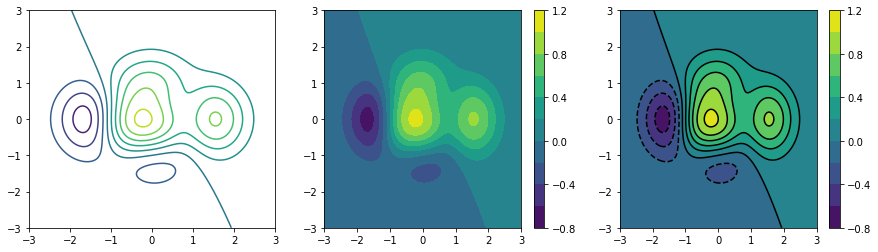

In [50]:
# Plot contour and contourf with colorbars
# By default matplotlib contours negative values with a dashed line. This behaviour can be changed with rcparams:
#plt.rcParams['contour.negative_linestyle']= 'solid' # Reset to default with `= 'dashed'`

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, data, 10)
mappable2 = ax2.contourf(X, Y, data, 10)
#mappable2.set_clim(0,1)

ax3.contour(X, Y, data, 10, colors='k')
mappable3 = ax3.contourf(X, Y, data, 10)

fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

#### Mini exercise: 10 min

Play around with the lines of code in the cell above, and see how the figure changes, e.g. 

* What happens if you try to add a colorbar to ax1? 

        *Answer: Lines appear rather than blocks of colour.* 

* Try plotting chosen contour levels for ax2 or ax3, and see what happens to the colorbar? 

        *Answer: The max/min levels will set the limits of your colorbar. Values outside these limits will appear white unless you specify `extend='max'`, `'min'` or `'both'`.* 


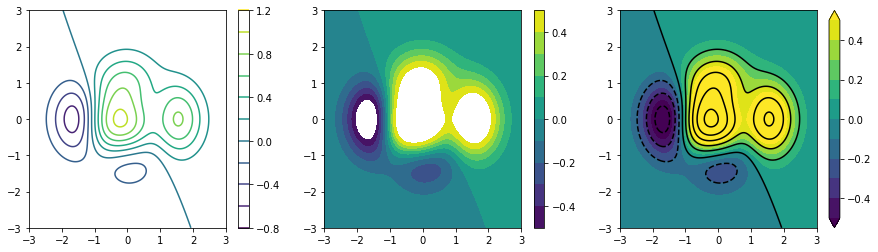

In [51]:
# Examples: 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
mappable1 = ax1.contour(X, Y, data, 10)
mappable2 = ax2.contourf(X, Y, data, levels=np.linspace(-0.5,0.5,11))
#mappable2.set_clim(0,1)

ax3.contour(X, Y, data, 10, colors='k')
mappable3 = ax3.contourf(X, Y, data, 10, levels=np.linspace(-0.5,0.5,11), extend='both')

fig.colorbar(mappable1, ax=ax1)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

---

## Final matplotlib exercise (20 mins)

Reproduce the figure below by using `contourf()` to show a map of sea surface temperature, and `plot()` for a zonally averaged temperature curve. 

The code for loading and processing the data is provided below, so you can focus on producing the figure...


Data source: https://podaac-tools.jpl.nasa.gov/las/UI.vm

Dataset: AMSR-E Level 3 Sea Surface Temperature for Climate Model Comparison.

Variable: Sea Surface Temperature (K).

Time : 16-JUN-2002 00:00.

Spacial resolution: 1$^{\circ}$x1$^{\circ}$, 361 by 180 points (longitude by latitude).

Total Number of Records: 64980.

All the data processing is handled for you here, with the following steps: 
* Read the data using `np.genfromtxt` (very similar to `np.loadtxt`, but can handle missing values). 
* Reshape the 1D data into a 2D lat-lon grid. 
* Calculate the zonal-mean temperature. 

In [52]:
# Read modelling sst data
lon_raw, lat_raw, sst_raw = np.genfromtxt('../../data/AMSR-E_Level_3_Sea_Surface_Temperature_for_Climate_Model_Comparison.csv', 
                                          delimiter=',', skip_header=10, missing_values='-1.E+34', 
                                          usemask=True, usecols=(2, 3, 4), unpack=True)

# Reshape into a grid of sst with corresponding lat and lon coordinates
lon = np.unique(lon_raw)
lat = np.unique(lat_raw)
sst = np.reshape(sst_raw,(len(lat),len(lon)))

# Calculate the zonal-mean temperature here
temp_zonal_mean = np.nanmean(sst,1);

Now, plot the data...

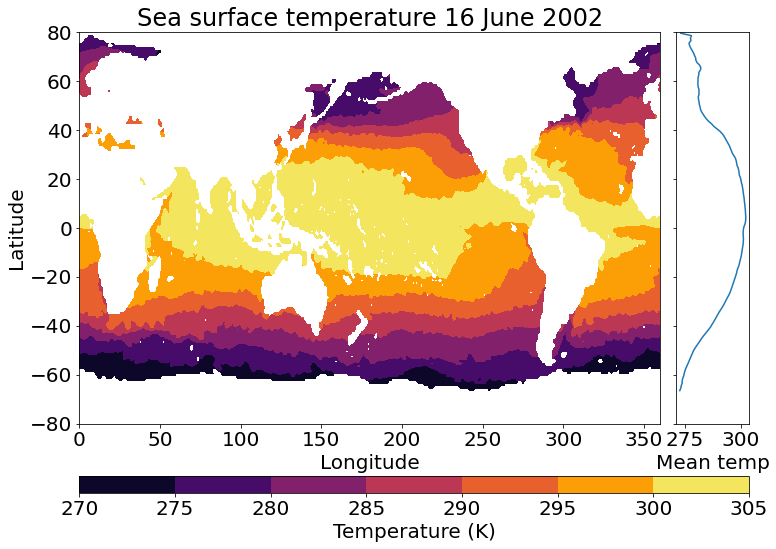

In [53]:
# Example Solution
# == Increasing the font size to improve readability ==
plt.rcParams.update({"font.size": 20})

# == set the subplot layout ==
fig, ax = plt.subplots(1, 2, figsize=(12,8), 
                       gridspec_kw={"width_ratios":[8, 1]}, sharey = True)
fig.subplots_adjust(wspace=0.05)

# plot the map on axis 0
cb = ax[0].contourf(lon, lat, sst, cmap='inferno')
ax[0].set_title('Sea surface temperature 16 June 2002')
ax[0].set(xlabel='Longitude', ylabel='Latitude', ylim = [-80,80])

# plot the zonal mean on axis 1
ax[1].plot(temp_zonal_mean, lat)
ax[1].set(xlabel='Mean temp')

# create a separate whole-width axis (cbar_ax) for the colorbar at the bottom
# -> set position relative to other axes.
fig.subplots_adjust(bottom=0.2)
pos0 = ax[0].get_position() # [x0=left, y0=bottom, x1=right, y1=top]
pos1 = ax[1].get_position()
cbar_ax = fig.add_axes([pos0.x0, 0.08, pos1.x1-pos0.x0, 0.03]) # [left, bottom, width, height]
fig.colorbar(cb, cax=cbar_ax, label=r"Temperature (K)", orientation='horizontal');

#fig.savefig('../../figures/matplotlib_map.png', dpi=300, bbox_inches='tight')

**NB. There is no "right" answer - you may find other ways to produce the same figure (or something better!)** 

## References: 
* https://matplotlib.org/faq/usage_faq.html
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
* https://matplotlib.org/stable/index.html
  * https://matplotlib.org/stable/gallery/index.html
* https://github.com/matplotlib/cheatsheets